Chennai, also known as Madras, is one of the four metro cities of India. Located on the coromondal coast, Chennai is majorly dependent on ground water resources to meet its water needs. However, Growing development and setting up of new industries in recent years, especially in southern Chennai, has taken its toll on ground water level . Currently, Chennai is facing an acute water shortage due to shortage of rainfall for the past three years (and we had one of the worst floods in history the year before that!). As a result, the water in these resources are depleting along with the groundwater level. The wetlands, once reponsible for ground water recharge, have now disappeared. We'll analyse the data of water level of major reservoir - Red Hills, Cholavaram, Poondi and Chembarambakkam - and try to understand and verify claims on decreasing water level.

Data is taken from: https://www.kaggle.com/sudalairajkumar/chennai-water-management

In [165]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [166]:
from plotly import __version__
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import cufflinks as cf

In [117]:
init_notebook_mode(connected=True)

In [167]:
cf.go_offline()

In [168]:
chennai1 = pd.read_csv('C:/Users/shrey/Desktop/data/chennai_reservoir_levels.csv')

In [169]:
chennai1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5647 entries, 0 to 5646
Data columns (total 5 columns):
Date               5647 non-null object
POONDI             5647 non-null float64
CHOLAVARAM         5647 non-null float64
REDHILLS           5647 non-null float64
CHEMBARAMBAKKAM    5647 non-null float64
dtypes: float64(4), object(1)
memory usage: 198.6+ KB


Thus, let us convert column 'Date' into DD-MM-YYYY format and all other columns into numeric

In [170]:
import datetime

In [171]:
chennai1['Date'] = pd.to_datetime(chennai1['Date'], format='%d-%m-%Y')


In [172]:
chennai1[['POONDI','CHOLAVARAM','REDHILLS','CHEMBARAMBAKKAM']] = chennai1[['POONDI','CHOLAVARAM','REDHILLS','CHEMBARAMBAKKAM']].apply(pd.to_numeric)

In [173]:
chennai = chennai1

In [174]:
chennai.head(5)

,Date,POONDI,CHOLAVARAM,REDHILLS,CHEMBARAMBAKKAM
0,2004-01-01,3.9,0.0,268.0,0.0
1,2004-01-02,3.9,0.0,268.0,0.0
2,2004-01-03,3.9,0.0,267.0,0.0
3,2004-01-04,3.9,0.0,267.0,0.0
4,2004-01-05,3.8,0.0,267.0,0.0


In [175]:
chennai.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5647 entries, 0 to 5646
Data columns (total 5 columns):
Date               5647 non-null datetime64[ns]
POONDI             5647 non-null float64
CHOLAVARAM         5647 non-null float64
REDHILLS           5647 non-null float64
CHEMBARAMBAKKAM    5647 non-null float64
dtypes: datetime64[ns](1), float64(4)
memory usage: 220.6 KB


Create two new columns: (i) Year (ii) Month

In [176]:
chennai['Year'] = chennai['Date'].apply(lambda x: x.year)

In [177]:
chennai['Month'] = chennai['Date'].apply(lambda x: x.month)

Create a new dataframe of all the 4 reservoir and analyse their water level from 2004 to 2019, using boxplot

In [178]:
dam = chennai[['POONDI','CHOLAVARAM','REDHILLS','CHEMBARAMBAKKAM']]

In [179]:
dam.iplot(kind = 'box')

Cholavaram reservoir is the smallest of the 4 reservoir, while Redhills contributes the most.

Create a new column: Total of all the 4 reserviors on any given day between 2004-2019

In [180]:
chennai['Total'] = chennai[['POONDI','CHOLAVARAM','REDHILLS','CHEMBARAMBAKKAM']].sum(axis=1)

In [181]:
chennai.head(1)

,Date,POONDI,CHOLAVARAM,REDHILLS,CHEMBARAMBAKKAM,Year,Month,Total
0,2004-01-01,3.9,0.0,268.0,0.0,2004,1,271.9


Rearranging the table for year by year analysis 

In [182]:
ByYear = chennai.groupby('Year', as_index= False)

In [183]:
ByYear.head(3)

,Date,POONDI,CHOLAVARAM,REDHILLS,CHEMBARAMBAKKAM,Year,Month,Total
0,2004-01-01,3.9,0.0,268.0,0.0,2004,1,271.9
1,2004-01-02,3.9,0.0,268.0,0.0,2004,1,271.9
2,2004-01-03,3.9,0.0,267.0,0.0,2004,1,270.9
366,2005-01-01,805.4,71.0,986.0,401.0,2005,1,2263.4
367,2005-01-02,799.9,69.0,996.0,397.0,2005,1,2261.9
368,2005-01-03,794.4,67.0,1007.0,393.0,2005,1,2261.4
731,2006-01-01,3231.0,763.0,3116.0,2986.0,2006,1,10096.0
732,2006-01-02,3231.0,762.0,3100.0,2986.0,2006,1,10079.0
733,2006-01-03,3231.0,760.0,3084.0,2986.0,2006,1,10061.0
1096,2007-01-01,2928.0,473.0,2507.0,2351.0,2007,1,8259.0


Text(0.5,1,'Mean yearly water level in all four reservoir regions')

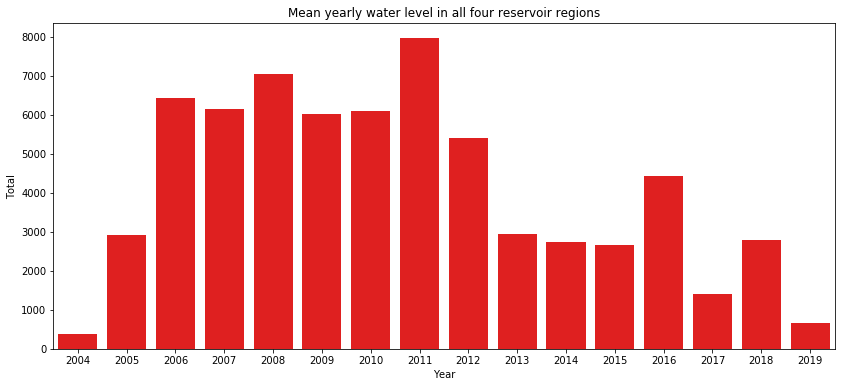

In [184]:
plt.figure(figsize=(14,6))
sns.barplot(x = 'Year', y ='Total', data = ByYear.mean(), color = 'r' )
plt.title("Mean yearly water level in all four reservoir regions")

Thus, water-level is on decling trend since year 2011. Following plot shows the variation of water-level in all the 4 reservoir

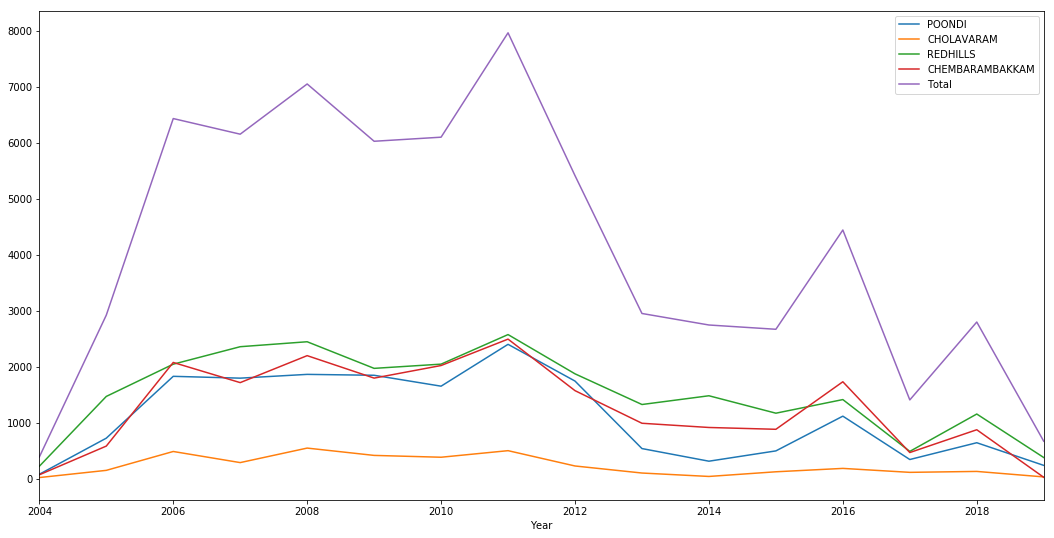

In [185]:
ByYear.mean().plot(x = 'Year', y = ['POONDI','CHOLAVARAM','REDHILLS','CHEMBARAMBAKKAM', 'Total'], figsize = (18,9))

In [144]:
chennai['Month'] = pd.Categorical(chennai['Month'])

Text(0.5,1,'Monthwise distribution of water in 4 reservoirs')

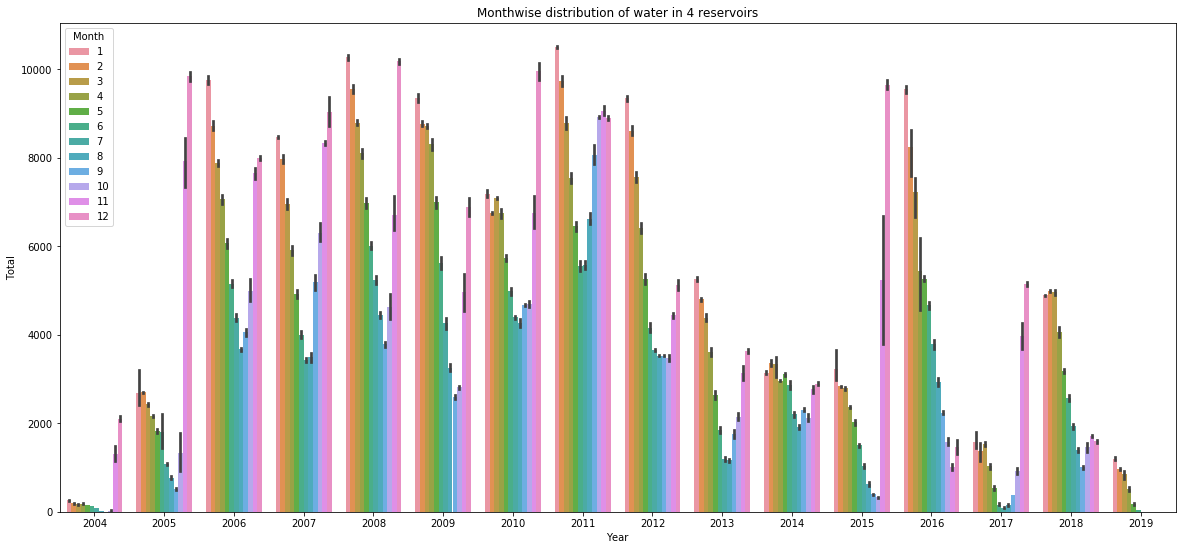

In [186]:
plt.figure(figsize=(20,9))
sns.barplot(x='Year', y = 'Total',  hue = 'Month', data = chennai)
plt.title('Monthwise distribution of water in 4 reservoirs')

Inferences:

a. Chennai gets some rains in the month of June, July, August and September due to south west monsoon.
b. But Majority of rainfall happens during October and November, due to North-east monsoon.
c. During the initial years rain from north-east monsoon is much higher than south-west monsoon. However, In last few years, both South West and North-East monsoon are contributing equally.
d. Declining North-East monsoon in recent years go in line with the declining rainfall in Meghalaya, which also depends on North-East monsoon.

Now, let's explore the availability of water at the start of the summer (February) 

In [189]:

feb = chennai.loc[chennai['Month'] == 2]

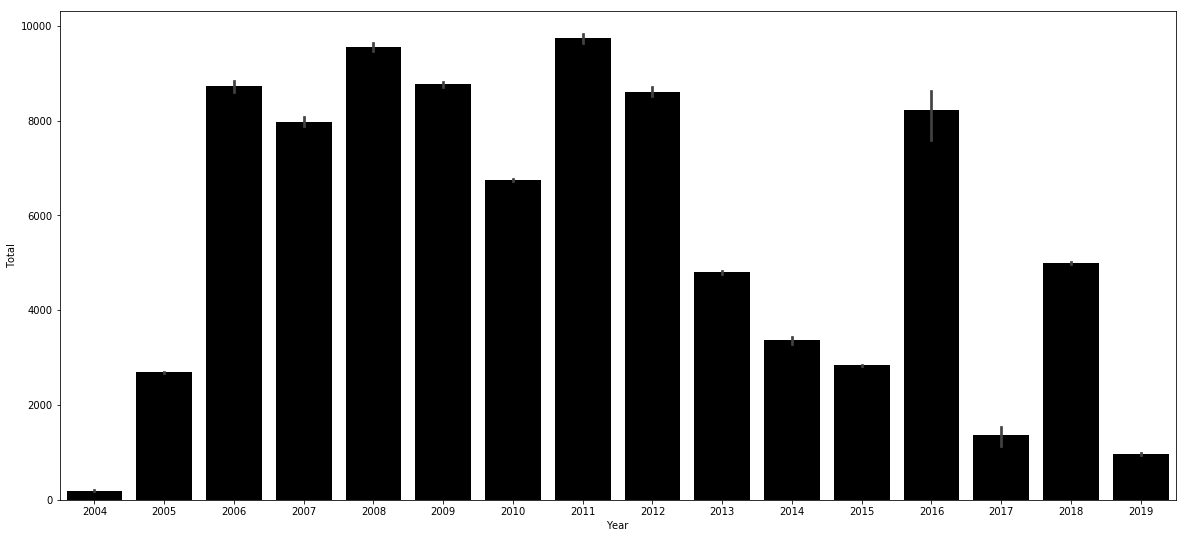

In [188]:
plt.figure(figsize=(20,9))
sns.barplot(x='Year', y = 'Total', data = feb, color = 'black')

This clearly indicates that there is not enough water in the reservoirs at the beginning of summer 2019 to cope up with the needs of the city. Infact this is at the second worst level after 2004. Bar few exceptions, the declining trend is clearly noticeable since 2011. As population as grown multiple times since 2004, water resources in 2019 is at the most critical stage.

However, Damage was being done when huge infrastructures took place of wetlands, near Kelambakkam area of South Chennai.

These are just repercussions....!!!